In [2]:
var openDigger = require('../src/open_digger');
var query = openDigger.driver.clickhouse.query;
query(    
    `SHOW DATABASES`
).then(res=>{    console.log(res);})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [92]:
query(    `SHOW TABLES from github_log`).then(res=>{    console.log(res);})

[
  { name: 'year2015' },
  { name: 'year2016' },
  { name: 'year2017' },
  { name: 'year2018' },
  { name: 'year2019' },
  { name: 'year2020' },
  { name: 'year2021' },
  { name: 'year2022' }
]


In [4]:
var year = 2016;
var limit = 10;
var id = 2579314;
query(    `SELECT type, created_date, actor_login, repo_forks_count
FROM github_log.year${year}    
WHERE repo_id=${id} and repo_forks_count > 0
ORDER BY created_date
LIMIT ${limit}
`).then(res=>{    console.log(res);});

[
  {
    type: 'PullRequestEvent',
    created_date: '2016-01-04',
    actor_login: 'fzaninotto',
    repo_forks_count: 1120
  },
  {
    type: 'PullRequestEvent',
    created_date: '2016-01-05',
    actor_login: 'ezburg',
    repo_forks_count: 1123
  },
  {
    type: 'PullRequestEvent',
    created_date: '2016-01-06',
    actor_login: 'fzaninotto',
    repo_forks_count: 1125
  },
  {
    type: 'PullRequestEvent',
    created_date: '2016-01-06',
    actor_login: 'hootlex',
    repo_forks_count: 1125
  },
  {
    type: 'PullRequestEvent',
    created_date: '2016-01-07',
    actor_login: 'fzaninotto',
    repo_forks_count: 1127
  },
  {
    type: 'PullRequestEvent',
    created_date: '2016-01-07',
    actor_login: 'drodil',
    repo_forks_count: 1127
  },
  {
    type: 'PullRequestReviewCommentEvent',
    created_date: '2016-01-07',
    actor_login: 'fzaninotto',
    repo_forks_count: 1127
  },
  {
    type: 'PullRequestEvent',
    created_date: '2016-01-08',
    actor_login: 'Newman101

In [15]:
var id = 2579314;
var year = 2020, startYear = 2015;
var startMonth = 12;
var endMonth = 2;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2015, 2016, 2017, 2018, 2019, 2020]
var dates = [];
var monthes = [];
for(var i = 0; i < years.length; i++){
    var y = years[i];
    // console.log(y);
    for(var j = 0; j < 12; j++){
        if(startMonth == 12){
            var startDate = y-1+'-'+startMonth+'-31';
        }else{
            var startDate = y+'-'+startMonth+'-31';
        }
        if(endMonth == 1){
            var endDate = y+1+'-'+endMonth+'-01';
            var month = y+'-'+12
        }else{
            var endDate = y+'-'+endMonth+'-01';
            var m1 = endMonth-1
            var month = y+'-'+m1
        }
        monthes.push(month);
        // console.log(month);
            if (startMonth == 12){
                startMonth = 1;
            }else{
                startMonth++;
            }
            if (endMonth == 12){
                endMonth = 1;
            }else{
                endMonth++;
            }
        var date = [startDate, endDate];
        // console.log(date);
        dates.push(date);
    }
};
query(`SELECT Count(*)
FROM github_log.year${startYear}    
WHERE repo_id=${id} and type = 'ForkEvent' and created_date > '2014-12-31' and created_date < '2015-02-01'
`).then(res=>{    console.log(res);});

[ { 'Count()': '46' } ]


┌─────────┬───────────┬────────────┐
│ (index) │   时间    │ 新增fork数 │
├─────────┼───────────┼────────────┤
│    0    │ '2015-1'  │    '46'    │
│    1    │ '2015-2'  │    '35'    │
│    2    │ '2015-3'  │    '49'    │
│    3    │ '2015-4'  │    '46'    │
│    4    │ '2015-5'  │    '44'    │
│    5    │ '2015-6'  │    '52'    │
│    6    │ '2015-7'  │    '53'    │
│    7    │ '2015-8'  │    '47'    │
│    8    │ '2015-9'  │    '66'    │
│    9    │ '2015-10' │    '66'    │
│   10    │ '2015-11' │    '52'    │
│   11    │ '2015-12' │    '33'    │
│   12    │ '2016-1'  │    '62'    │
│   13    │ '2016-2'  │    '49'    │
│   14    │ '2016-3'  │    '56'    │
│   15    │ '2016-4'  │    '55'    │
│   16    │ '2016-5'  │    '55'    │
│   17    │ '2016-6'  │    '56'    │
│   18    │ '2016-7'  │    '54'    │
│   19    │ '2016-8'  │    '49'    │
│   20    │ '2016-9'  │    '45'    │
│   21    │ '2016-10' │    '52'    │
│   22    │ '2016-11' │    '49'    │
│   23    │ '2016-12' │    '46'    │
│   24

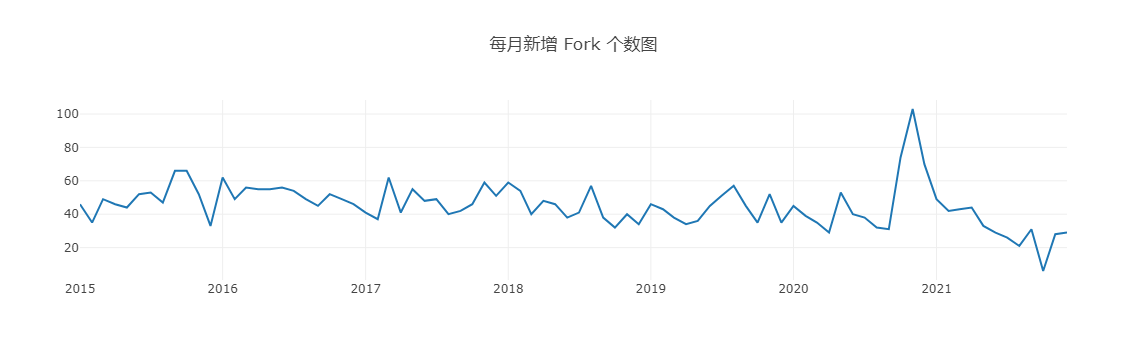

In [212]:
Promise.all(dates.map(d => {
    var y = 0;
    // console.log(d);
    var m = d[0].substring(5,7);
    if(m == '12'){
        y = d[1].substring(0,4);
    }else{
        y = d[0].substring(0,4);
    }
    // console.log(m)
    // console.log(y)
        var q = `SELECT COUNT(*) as fork_count
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'ForkEvent' and created_date > toDate('${d[0]}')
        and created_date < toDate('${d[1]}')`;
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    var fork_count = [];
    data.forEach(d => {
        fork_count.push(d[0].fork_count);
    });
    console.table(data.map((d, i) => {
        return {
            '时间':monthes[i++],
            '新增fork数': d[0].fork_count,
        };
    }));
    openDigger.render.plotly([
        {x: monthes, y: fork_count, mode: 'scatter', name: 'FORK数量'},
    ], {
        title: '每月新增 Fork 个数图',
    });
});

┌─────────┬───────────┬────────────┐
│ (index) │   时间    │ 新增star数 │
├─────────┼───────────┼────────────┤
│    0    │ '2015-2'  │    185     │
│    1    │ '2015-3'  │    237     │
│    2    │ '2015-4'  │    194     │
│    3    │ '2015-5'  │    213     │
│    4    │ '2015-6'  │    180     │
│    5    │ '2015-7'  │    226     │
│    6    │ '2015-8'  │    222     │
│    7    │ '2015-9'  │    261     │
│    8    │ '2015-10' │    245     │
│    9    │ '2015-11' │    224     │
│   10    │ '2015-12' │    229     │
│   11    │ '2016-1'  │    230     │
│   12    │ '2016-2'  │    181     │
│   13    │ '2016-3'  │    237     │
│   14    │ '2016-4'  │    235     │
│   15    │ '2016-5'  │    197     │
│   16    │ '2016-6'  │    196     │
│   17    │ '2016-7'  │    184     │
│   18    │ '2016-8'  │    249     │
│   19    │ '2016-9'  │    158     │
│   20    │ '2016-10' │    188     │
│   21    │ '2016-11' │    188     │
│   22    │ '2016-12' │    181     │
│   23    │ '2017-1'  │    151     │
│   24

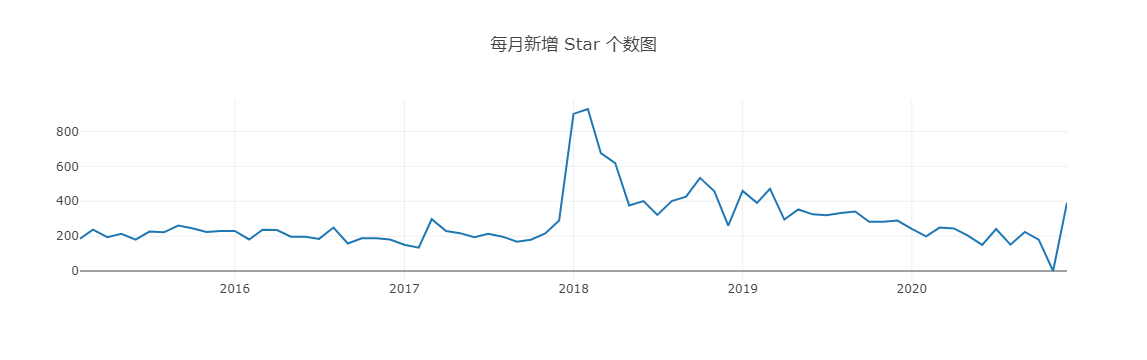

In [235]:
Promise.all(dates.map(d => {
    var y = 0;
    // console.log(d);
    var m = d[0].substring(5,7);
    if(m == '12'){
        y = d[1].substring(0,4);
    }else{
        y = d[0].substring(0,4);
    }
    // console.log(m)
    // console.log(y)
        var q = `SELECT Max(repo_stargazers_count) as star_count
        FROM github_log.year${y}
        WHERE repo_id=${id} and created_date > toDate('${d[0]}')
        and created_date < toDate('${d[1]}')`;
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    var star_count = [];
    monthes.splice(0,1);
    for(var i = 0; i < data.length-1; i++){
        if(parseInt(data[i][0].star_count)!=0){
            var k = parseInt(data[i][0].star_count)
        }
        var d = parseInt(data[i+1][0].star_count) - k
        if(d<0){
            d=0;
        }
        // console.log(d)
        star_count.push(d);
    };
    console.table(star_count.map((d, i) => {
        return {
            '时间':monthes[i++],
            '新增star数': d,
        };
    }));
    openDigger.render.plotly([
        {x: monthes, y: star_count, mode: 'scatter', name: 'STAR数量'},
    ], {
        title: '每月新增 Star 个数图',
    });
});

In [241]:
monthes.unshift('2015-1')
// console.log(monthes)
var issue_count = [];
Promise.all(dates.map(d => {
    var y = 0;
    // console.log(d);
    var m = d[0].substring(5,7);
    if(m == '12'){
        y = d[1].substring(0,4);
    }else{
        y = d[0].substring(0,4);
    }
    // console.log(m)
    // console.log(y)
        var q = `SELECT COUNT(*) as issue_count
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'IssuesEvent' and created_date > toDate('${d[0]}')
        and created_date < toDate('${d[1]}')`;
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    // var issue_count = [];
    data.forEach(d => {
        issue_count.push(d[0].issue_count);
    });
    console.table(issue_count.map((d, i) => {
        return {
            '时间':monthes[i++],
            '新增issue数': d,
        };
    }));
});

┌─────────┬───────────┬─────────────┐
│ (index) │   时间    │ 新增issue数 │
├─────────┼───────────┼─────────────┤
│    0    │ '2015-1'  │    '18'     │
│    1    │ '2015-2'  │     '5'     │
│    2    │ '2015-3'  │    '10'     │
│    3    │ '2015-4'  │    '11'     │
│    4    │ '2015-5'  │    '27'     │
│    5    │ '2015-6'  │    '11'     │
│    6    │ '2015-7'  │    '18'     │
│    7    │ '2015-8'  │    '22'     │
│    8    │ '2015-9'  │    '12'     │
│    9    │ '2015-10' │    '18'     │
│   10    │ '2015-11' │     '8'     │
│   11    │ '2015-12' │     '4'     │
│   12    │ '2016-1'  │    '11'     │
│   13    │ '2016-2'  │    '24'     │
│   14    │ '2016-3'  │    '11'     │
│   15    │ '2016-4'  │    '21'     │
│   16    │ '2016-5'  │    '12'     │
│   17    │ '2016-6'  │    '13'     │
│   18    │ '2016-7'  │     '8'     │
│   19    │ '2016-8'  │    '21'     │
│   20    │ '2016-9'  │    '18'     │
│   21    │ '2016-10' │    '31'     │
│   22    │ '2016-11' │    '13'     │
│   23    │ '2016

┌─────────┬───────────┬─────────────┐
│ (index) │   时间    │ 关闭issue数 │
├─────────┼───────────┼─────────────┤
│    0    │ '2015-1'  │    '13'     │
│    1    │ '2015-2'  │     '1'     │
│    2    │ '2015-3'  │     '5'     │
│    3    │ '2015-4'  │     '6'     │
│    4    │ '2015-5'  │    '12'     │
│    5    │ '2015-6'  │     '3'     │
│    6    │ '2015-7'  │     '8'     │
│    7    │ '2015-8'  │    '10'     │
│    8    │ '2015-9'  │     '4'     │
│    9    │ '2015-10' │    '11'     │
│   10    │ '2015-11' │     '3'     │
│   11    │ '2015-12' │     '2'     │
│   12    │ '2016-1'  │     '5'     │
│   13    │ '2016-2'  │    '19'     │
│   14    │ '2016-3'  │     '5'     │
│   15    │ '2016-4'  │    '11'     │
│   16    │ '2016-5'  │     '6'     │
│   17    │ '2016-6'  │     '6'     │
│   18    │ '2016-7'  │     '2'     │
│   19    │ '2016-8'  │     '9'     │
│   20    │ '2016-9'  │     '9'     │
│   21    │ '2016-10' │    '17'     │
│   22    │ '2016-11' │     '5'     │
│   23    │ '2016

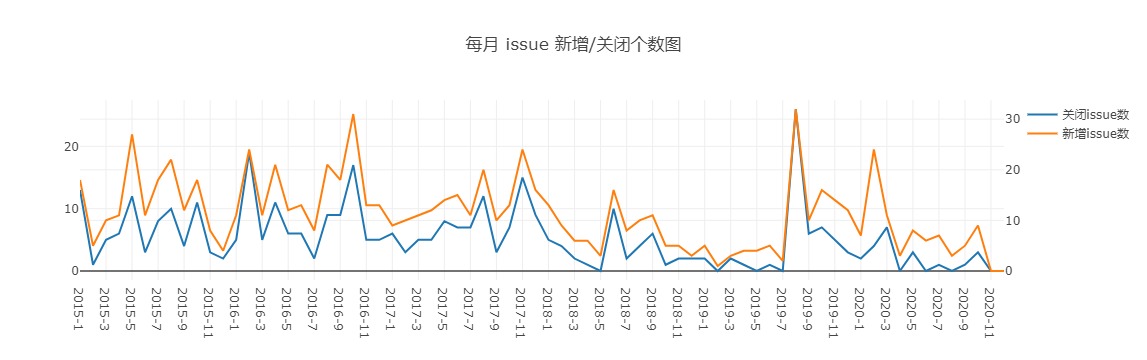

In [242]:
Promise.all(dates.map(d => {
    var y = 0;
    // console.log(d);
    var m = d[0].substring(5,7);
    if(m == '12'){
        y = d[1].substring(0,4);
    }else{
        y = d[0].substring(0,4);
    }
    // console.log(m)
    // console.log(y)
        var q = `SELECT COUNT(*) as closed_issue_count
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'IssuesEvent' and created_date > toDate('${d[0]}')
        and created_date < toDate('${d[1]}') and issue_closed_at > '1970-01-01 00:00:00'`; 
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    var closed_issue_count = [];
    data.forEach(d => {
        closed_issue_count.push(d[0].closed_issue_count);
    });
    console.table(closed_issue_count.map((d, i) => {
        return {
            '时间':monthes[i++],
            '关闭issue数': d,
        };
    }));
    openDigger.render.plotly([
        {x: monthes, y: closed_issue_count, mode: 'scatter', name: '关闭issue数'},
        {x: monthes, y: issue_count, mode: 'scatter', name: '新增issue数', yaxis: 'y2'},
    ], {
        title: '每月 issue 新增/关闭个数图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

In [243]:
var PR_count = [];
Promise.all(dates.map(d => {
    var y = 0;
    // console.log(d);
    var m = d[0].substring(5,7);
    if(m == '12'){
        y = d[1].substring(0,4);
    }else{
        y = d[0].substring(0,4);
    }
    // console.log(m)
    // console.log(y)
        var q = `SELECT COUNT(*) as PR_count
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'PullRequestEvent' and created_date > toDate('${d[0]}')
        and created_date < toDate('${d[1]}')`;
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    data.forEach(d => {
        PR_count.push(d[0].PR_count);
    });
    console.table(PR_count.map((d, i) => {
        return {
            '时间':monthes[i++],
            '新开PR数': d,
        };
    }));
});

┌─────────┬───────────┬──────────┐
│ (index) │   时间    │ 新开PR数 │
├─────────┼───────────┼──────────┤
│    0    │ '2015-1'  │   '52'   │
│    1    │ '2015-2'  │   '17'   │
│    2    │ '2015-3'  │   '28'   │
│    3    │ '2015-4'  │   '20'   │
│    4    │ '2015-5'  │   '34'   │
│    5    │ '2015-6'  │   '39'   │
│    6    │ '2015-7'  │   '43'   │
│    7    │ '2015-8'  │   '42'   │
│    8    │ '2015-9'  │   '33'   │
│    9    │ '2015-10' │   '72'   │
│   10    │ '2015-11' │   '34'   │
│   11    │ '2015-12' │   '13'   │
│   12    │ '2016-1'  │   '24'   │
│   13    │ '2016-2'  │   '86'   │
│   14    │ '2016-3'  │   '33'   │
│   15    │ '2016-4'  │   '62'   │
│   16    │ '2016-5'  │   '30'   │
│   17    │ '2016-6'  │   '30'   │
│   18    │ '2016-7'  │   '35'   │
│   19    │ '2016-8'  │   '21'   │
│   20    │ '2016-9'  │   '42'   │
│   21    │ '2016-10' │   '54'   │
│   22    │ '2016-11' │   '34'   │
│   23    │ '2016-12' │   '29'   │
│   24    │ '2017-1'  │   '17'   │
│   25    │ '2017-2'  │  

┌─────────┬───────────┬──────────┐
│ (index) │   时间    │ 合入PR数 │
├─────────┼───────────┼──────────┤
│    0    │ '2015-1'  │   '16'   │
│    1    │ '2015-2'  │   '6'    │
│    2    │ '2015-3'  │   '9'    │
│    3    │ '2015-4'  │   '6'    │
│    4    │ '2015-5'  │   '15'   │
│    5    │ '2015-6'  │   '7'    │
│    6    │ '2015-7'  │   '11'   │
│    7    │ '2015-8'  │   '14'   │
│    8    │ '2015-9'  │   '10'   │
│    9    │ '2015-10' │   '18'   │
│   10    │ '2015-11' │   '10'   │
│   11    │ '2015-12' │   '0'    │
│   12    │ '2016-1'  │   '8'    │
│   13    │ '2016-2'  │   '38'   │
│   14    │ '2016-3'  │   '9'    │
│   15    │ '2016-4'  │   '19'   │
│   16    │ '2016-5'  │   '5'    │
│   17    │ '2016-6'  │   '5'    │
│   18    │ '2016-7'  │   '7'    │
│   19    │ '2016-8'  │   '3'    │
│   20    │ '2016-9'  │   '14'   │
│   21    │ '2016-10' │   '17'   │
│   22    │ '2016-11' │   '10'   │
│   23    │ '2016-12' │   '9'    │
│   24    │ '2017-1'  │   '6'    │
│   25    │ '2017-2'  │  

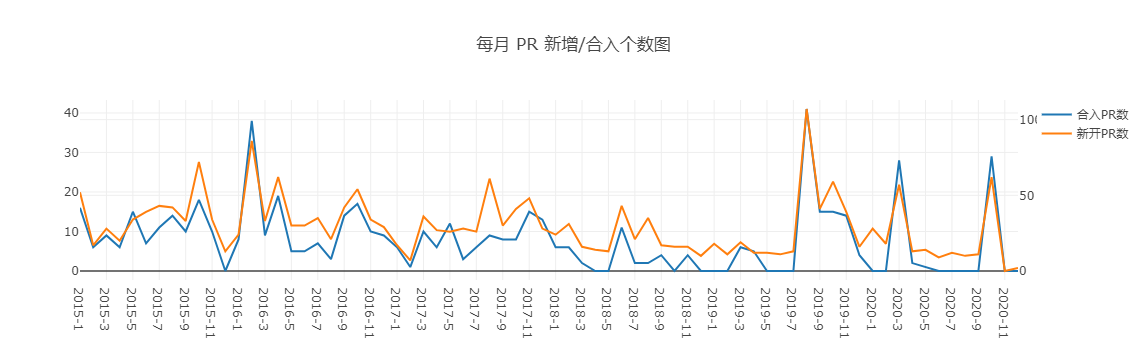

In [244]:
Promise.all(dates.map(d => {
    var y = 0;
    // console.log(d);
    var m = d[0].substring(5,7);
    if(m == '12'){
        y = d[1].substring(0,4);
    }else{
        y = d[0].substring(0,4);
    }
    // console.log(m)
    // console.log(y)
        var q = `SELECT COUNT(*) as PR_merge_count
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'PullRequestEvent' and created_date > toDate('${d[0]}')
        and created_date < toDate('${d[1]}') and pull_merged_at > '1970-01-01 00:00:00'`; 
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    var PR_merge_count = [];
    data.forEach(d => {
        PR_merge_count.push(d[0].PR_merge_count);
    });
    console.table(PR_merge_count.map((d, i) => {
        return {
            '时间':monthes[i++],
            '合入PR数': d,
        };
    }));
    openDigger.render.plotly([
        {x: monthes, y: PR_merge_count, mode: 'scatter', name: '合入PR数'},
        {x: monthes, y: PR_count, mode: 'scatter', name: '新开PR数', yaxis: 'y2'},
    ], {
        title: '每月 PR 新增/合入个数图',
        yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬──────────────┐
│ (index) │   时间    │ 活跃开发者数 │
├─────────┼───────────┼──────────────┤
│    0    │ '2015-1'  │    '242'     │
│    1    │ '2015-2'  │    '232'     │
│    2    │ '2015-3'  │    '294'     │
│    3    │ '2015-4'  │    '288'     │
│    4    │ '2015-5'  │    '261'     │
│    5    │ '2015-6'  │    '272'     │
│    6    │ '2015-7'  │    '288'     │
│    7    │ '2015-8'  │    '301'     │
│    8    │ '2015-9'  │    '362'     │
│    9    │ '2015-10' │    '324'     │
│   10    │ '2015-11' │    '289'     │
│   11    │ '2015-12' │    '278'     │
│   12    │ '2016-1'  │    '310'     │
│   13    │ '2016-2'  │    '273'     │
│   14    │ '2016-3'  │    '313'     │
│   15    │ '2016-4'  │    '310'     │
│   16    │ '2016-5'  │    '273'     │
│   17    │ '2016-6'  │    '267'     │
│   18    │ '2016-7'  │    '272'     │
│   19    │ '2016-8'  │    '300'     │
│   20    │ '2016-9'  │    '231'     │
│   21    │ '2016-10' │    '285'     │
│   22    │ '2016-11' │    '268' 

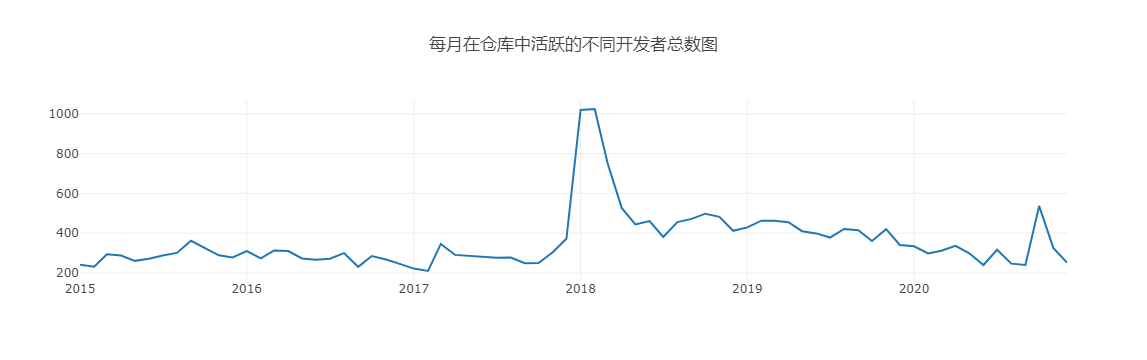

In [245]:
Promise.all(dates.map(d => {
    var y = 0;
    // console.log(d);
    var m = d[0].substring(5,7);
    if(m == '12'){
        y = d[1].substring(0,4);
    }else{
        y = d[0].substring(0,4);
    }
    // console.log(m)
    // console.log(y)
        var q = `SELECT COUNT(DISTINCT actor_id) AS active_actor_count
        FROM github_log.year${y}
        WHERE repo_id=${id} and created_date > toDate('${d[0]}')
        and created_date < toDate('${d[1]}')`; 
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    var active_actor_count = [];
    data.forEach(d => {
        active_actor_count.push(d[0].active_actor_count);
    });
    console.table(active_actor_count.map((d, i) => {
        return {
            '时间':monthes[i++],
            '活跃开发者数': d,
        };
    }));
    openDigger.render.plotly([
        {x: monthes, y: active_actor_count, mode: 'scatter', name: '开发者数'},
    ], {
        title: '每月在仓库中活跃的不同开发者总数图',
    });
});

In [253]:
query(`SELECT issue_closed_at, issue_created_at, issue_closed_at - issue_created_at
FROM github_log.year2016   
WHERE repo_id=${id} and type = 'IssuesEvent' and issue_closed_at > '1970-01-01 00:00:00'
LIMIT 5
`).then(res=>{    console.log(res);});

SyntaxError: Unexpected token '{'

In [277]:
function formatSeconds(value){
  var second = parseInt(value)
  var minute = 0
  var hour = 0
  var day = 0
  if (second > 60) {
    minute = parseInt(second / 60)
    second = parseInt(second % 60)
    if (minute > 60) {
        hour = parseInt(minute / 60)
        minute = parseInt(minute % 60)
    }
    if (hour > 23) {
        day = parseInt(hour / 24)
        hour = parseInt(hour % 24)
       }
  }

    var result = '' + parseInt(second) + '秒'
    if (minute > 0) {
    result = '' + parseInt(minute) + '分' + result
    }
    if (hour > 0) {
        result = '' + parseInt(hour) + '小时' + result
    }
    if (day > 0) {
        result = '' + parseInt(day) + '天' + result
    }
  // console.log('Issue 从打开到关闭的平均时长：', result)
  return result
}

function medianof2Arr(arr1) {
    var concat = arr1;
    concat = concat.sort(function (a, b) { return a - b });
    // console.log(concat);
    var length = concat.length;
    if (length % 2 == 1) {
        // console.log(concat[(length / 2) - .5])
        return concat[(length / 2) - .5]
    }else {
        // console.log((concat[length / 2] + concat[(length / 2) - 1]) / 2);
        return (concat[length / 2] + concat[(length / 2) - 1]) / 2;
    }
}

In [278]:
Promise.all(years.map(y => {
    // console.log(y)
        var q = `SELECT SUM(issue_closed_at - issue_created_at) as time, COUNT(*) as count
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'IssuesEvent' and issue_closed_at > '1970-01-01 00:00:00'`; 
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    console.log(data);
    var time_count = 0;
    var count = 0;
    var times = [];
    data.forEach(d => {
        times.push(parseInt(d[0].time));
        time_count += parseInt(d[0].time)
        count += parseInt(d[0].count)
    });
    var second = time_count/count
    console.log('Issue 从打开到关闭的平均时长：', formatSeconds(second), '中位数：', formatSeconds(medianof2Arr(times)))
});

[
  [ { time: '275736504', count: '79' } ],
  [ { time: '509104638', count: '101' } ],
  [ { time: '711837175', count: '88' } ],
  [ { time: '201797743', count: '40' } ],
  [ { time: '1302235475', count: '53' } ],
  [ { time: '67652351', count: '21' } ]
]
Issue 从打开到关闭的平均时长： 92天23小时12分46秒 中位数： 4541天21小时42分51秒


In [283]:
Promise.all(years.map(y => {
    // console.log(y)
        var q = `SELECT issue_closed_at, issue_created_at
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'IssuesEvent' and issue_closed_at > '1970-01-01 00:00:00'
        LIMIT 0`; 
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    console.log(data);
});

[ [], [], [], [], [], [] ]


In [293]:
Promise.all(years.map(y => {
    // console.log(y)
        var q = `SELECT SUM(pull_merged_at - issue_created_at) as time, COUNT(*) as count
        FROM github_log.year${y}
        WHERE repo_id=${id} and type = 'PullRequestEvent' and pull_merged_at > '1970-01-01 00:00:00'`; 
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    var time_count = 0;
    var count = 0;
    var times = [];
    data.forEach(d => {
        times.push(parseInt(d[0].time));
        time_count += parseInt(d[0].time)
        count += parseInt(d[0].count)
    });
    var second = time_count/count
    console.log('PR 从打开到合并的平均时长：', formatSeconds(second), '中位数：', formatSeconds(medianof2Arr(times)))
});

PR 从打开到合并的平均时长： 52天8小时34分56秒 中位数： 3024天12小时54分34秒


In [22]:
Promise.all(years.map(y => {
    // console.log(y)
        var q = `SELECT issue_id, SUM(issue_comment_created_at - issue_created_at)
        FROM github_log.year2015
        WHERE issue_id IN(
            SELECT MIN(issue_comment_created_at), issue_id FROM github_log.year${y}
            WHERE type = 'IssueCommentEvent'
            GROUP BY issue_id
        )and repo_id=${id} and (type = 'IssueEvent' or type = 'IssueCommentEvent') and issue_comment_author_id != issue_author_id
        GROUP BY issue_id`; 
        return openDigger.driver.clickhouse.query(q);
})).then(data => {
    // console.log(data);
    var time_count = 0;
    var count = 0;
    var times = [];
    data.forEach(d => {
        console.log(d);
        times.push(parseInt(d[0].time));
        time_count += parseInt(d[0].time)
        count += parseInt(d[0].count)
    });
    var second = time_count/count
    console.log('Issue 从打开到第一次收到评论的平均时长：', formatSeconds(second), '中位数：', formatSeconds(medianof2Arr(times)))
});

Error: Syntax error: failed at position 126 ('IN') (line 3, col 27): IN(            SELECT MIN(issue_comment_created_at), issue_id FROM github_log.year2017            WHERE type = 'IssueCommentEvent'            GROUP BY issue_. Expected one of: Comma, Arrow, token (version 20.8.7.15 (official build))